In [1]:
# Uninstall current versions
!pip uninstall -y scikit-learn imbalanced-learn

# Install compatible versions
!pip install scikit-learn==1.4.2 imbalanced-learn==0.12.4


Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
Found existing installation: imbalanced-learn 0.12.4
Uninstalling imbalanced-learn-0.12.4:
  Successfully uninstalled imbalanced-learn-0.12.4
  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


---

# Restart kernel after above installation step
---

In [2]:
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

print(f"✓ scikit-learn: {sklearn.__version__}")
print(f"✓ imbalanced-learn: {imblearn.__version__}")
print("✓ All imports successful!")

# Test SMOTE works
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, weights=[0.9, 0.1], random_state=42)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(f"✓ SMOTE working: {len(X)} → {len(X_res)} samples")


✓ scikit-learn: 1.4.2
✓ imbalanced-learn: 0.12.4
✓ All imports successful!
✓ SMOTE working: 100 → 180 samples


GPU CONFIGURATION CHECK
TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
XGBoost built with GPU support: {'use_rmm': False, 'verbosity': 1}
✓ GPU detected - Training will be accelerated
/kaggle/input/creditcardfraud/creditcard.csv

DATA LOADING AND PREPROCESSING
Dataset Shape: (284807, 31)
Fraud Cases: 492 (0.1727%)

Training set (balanced): 454902 samples
Test set: 56962 samples
Class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64

TRAINING GRADIENT BOOSTING MODELS

[1/3] Training XGBoost (GPU)...
XGBoost ROC-AUC: 0.9809
XGBoost F1-Score: 0.8173

[2/3] Training LightGBM (GPU)...
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightG

[I 2025-11-21 18:25:47,969] A new study created in memory with name: xgboost_optimization


DNN ROC-AUC: 0.9795
DNN F1-Score: 0.4778

OPTUNA HYPERPARAMETER OPTIMIZATION

Optimizing XGBoost (20 trials)...


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-11-21 18:25:51,348] Trial 0 finished with value: 0.7257383966244726 and parameters: {'n_estimators': 342, 'max_depth': 10, 'learning_rate': 0.16724105370652528, 'subsample': 0.7462944026460205, 'colsample_bytree': 0.7537739820080621, 'min_child_weight': 2, 'gamma': 4.311086113168917, 'reg_alpha': 2.3286750398063516, 'reg_lambda': 2.059276817682878}. Best is trial 0 with value: 0.7257383966244726.
[I 2025-11-21 18:25:55,733] Trial 1 finished with value: 0.651685393258427 and parameters: {'n_estimators': 720, 'max_depth': 6, 'learning_rate': 0.22117065422648033, 'subsample': 0.7121993486271716, 'colsample_bytree': 0.8561657304174743, 'min_child_weight': 3, 'gamma': 4.630651332822232, 'reg_alpha': 6.547667710330226, 'reg_lambda': 0.0763227154259194}. Best is trial 0 with value: 0.7257383966244726.
[I 2025-11-21 18:26:01,157] Trial 2 finished with value: 0.6692307692307692 and parameters: {'n_estimators': 596, 'max_depth': 10, 'learning_rate': 0.049370572683338845, 'subsample': 0.8

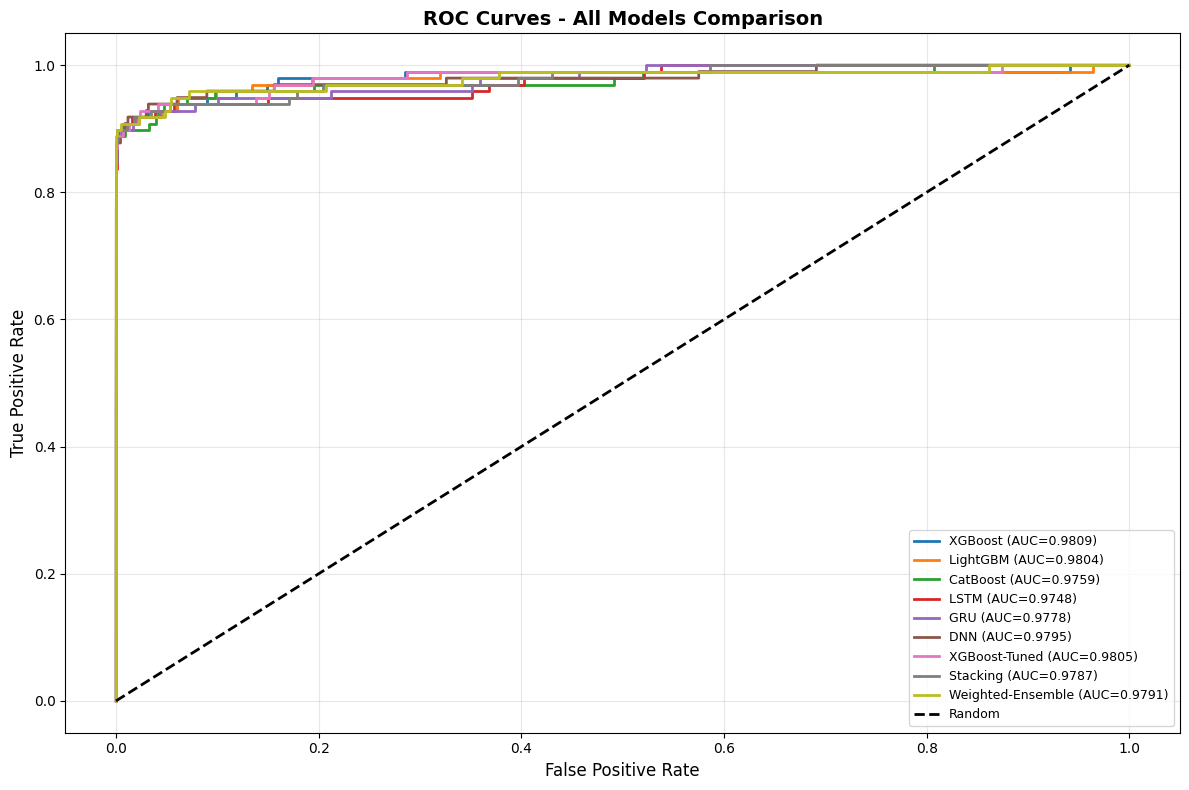

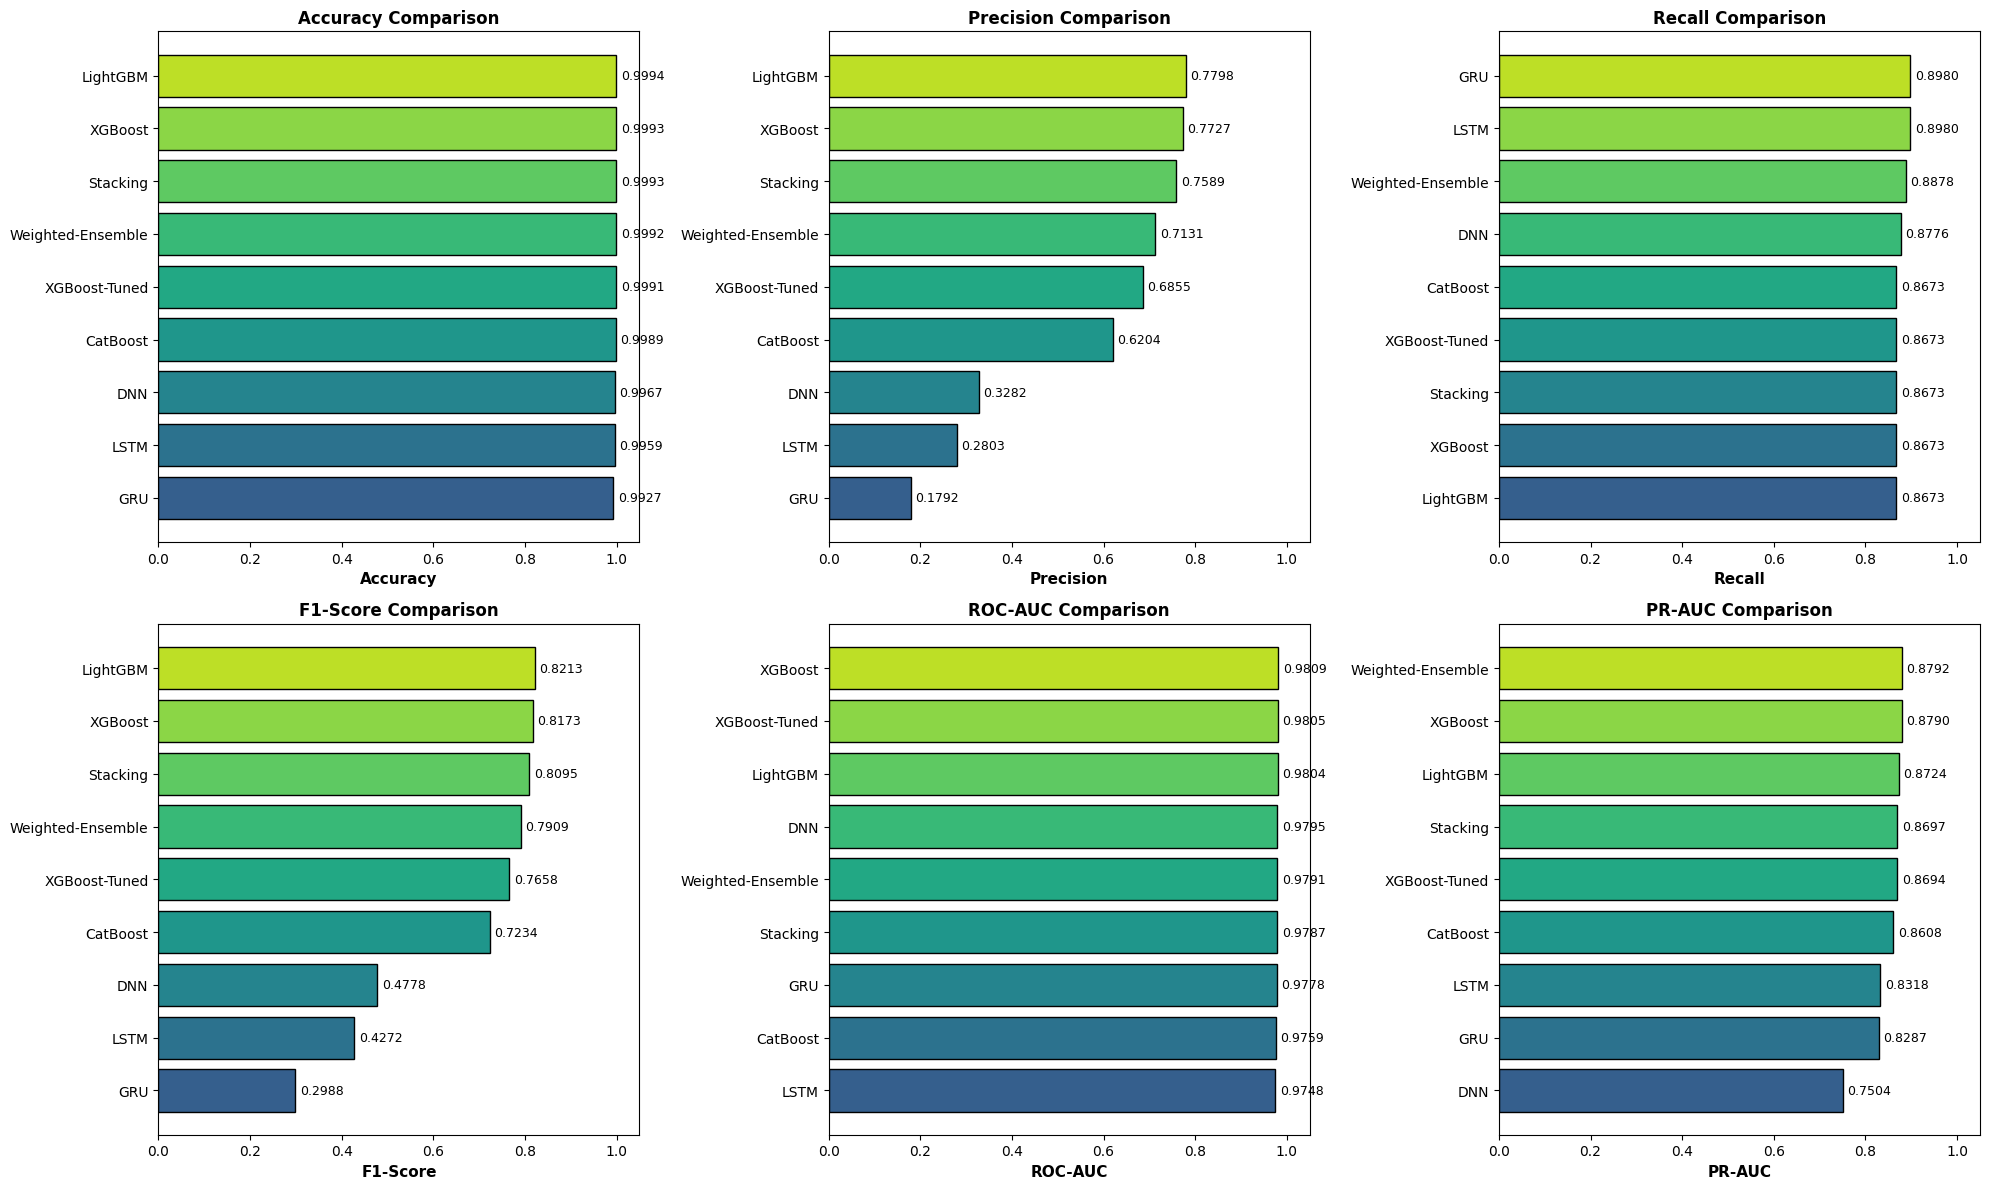

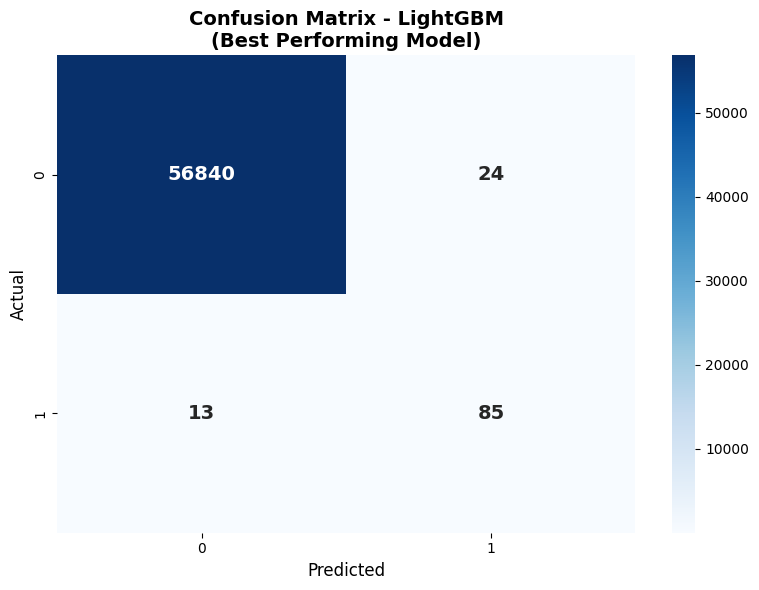

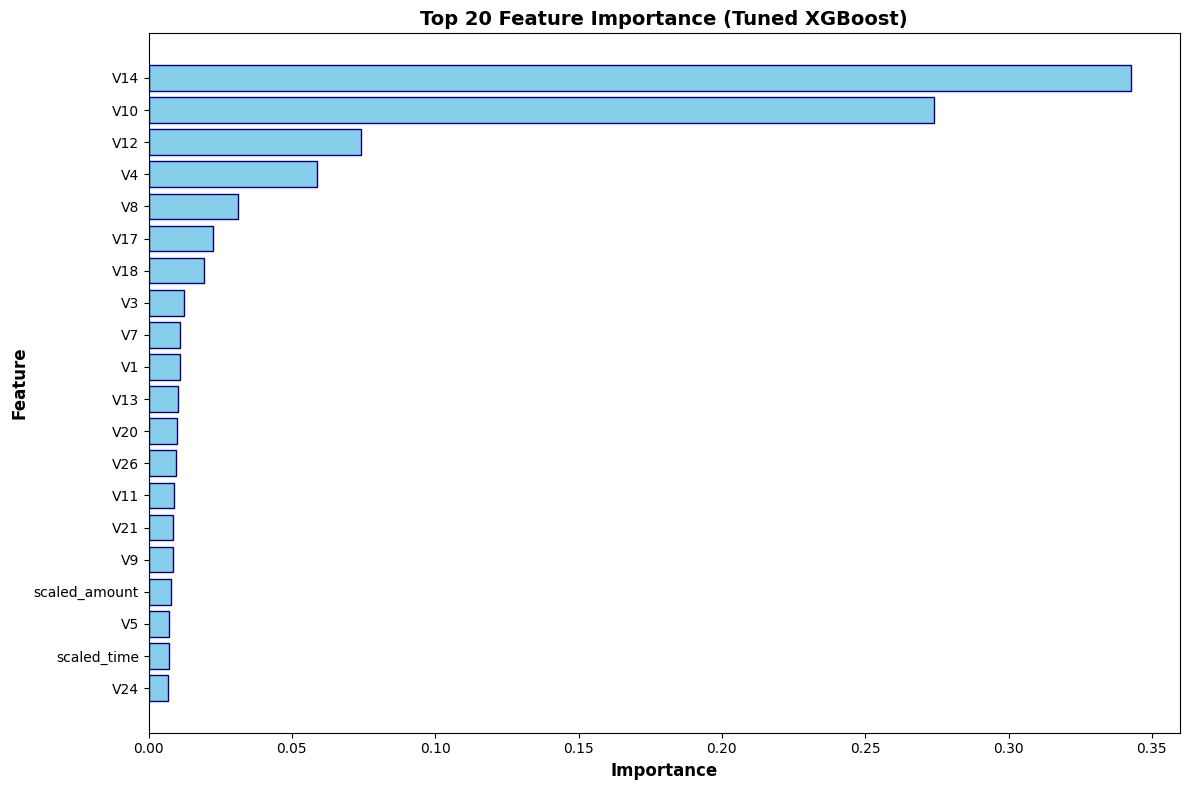


FINAL RESULTS SUMMARY

🏆 BEST MODEL: LightGBM

📊 Performance Metrics:
   ├─ Accuracy:  0.9994
   ├─ Precision: 0.7798
   ├─ Recall:    0.8673
   ├─ F1-Score:  0.8213
   ├─ ROC-AUC:   0.9804
   └─ PR-AUC:    0.8724

📈 Top 3 Models:
   2. LightGBM: F1=0.8213, ROC-AUC=0.9804
   1. XGBoost: F1=0.8173, ROC-AUC=0.9809
   8. Stacking: F1=0.8095, ROC-AUC=0.9787

STATE-OF-THE-ART FRAUD DETECTION COMPLETED

💡 Key Improvements Over Baseline:
   ✓ GPU-accelerated gradient boosting (XGBoost, LightGBM, CatBoost)
   ✓ Deep learning models (LSTM, GRU, DNN)
   ✓ Optuna hyperparameter optimization
   ✓ Advanced stacking ensemble
   ✓ Weighted soft voting ensemble
   ✓ 6 evaluation metrics for comprehensive assessment

✓ Results saved to 'model_comparison_results.csv'


In [4]:
# ==========================================
# STATE-OF-THE-ART FRAUD DETECTION SYSTEM
# Dataset: Kaggle Credit Card Fraud Detection Dataset
# GPU Recommendation: Select GPU T4 x2 or GPU P100 in Kaggle (NOT CPU)
# ==========================================

# IMPORTANT: Enable GPU in Kaggle Notebook Settings
# Go to: Settings -> Accelerator -> Select "GPU T4 x2" or "GPU P100"
# Deep learning models and gradient boosting will benefit significantly from GPU

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve,
                             average_precision_score)

# Gradient Boosting Libraries (GPU-Enabled)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Dropout, LSTM, GRU, BatchNormalization, 
                                     Input, Bidirectional, Attention, Concatenate)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Hyperparameter Optimization
import optuna
#from optuna.integration import TFKerasPruningCallback

# Check GPU availability
print("="*60)
print("GPU CONFIGURATION CHECK")
print("="*60)
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")
print(f"XGBoost built with GPU support: {xgb.get_config()}")
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("✓ GPU detected - Training will be accelerated")
else:
    print("⚠ WARNING: No GPU detected - Training will be slower")
    print("  Recommendation: Enable GPU T4 x2 or P100 in Kaggle settings")

# For Kaggle environment
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# ==========================================
# 1. LOAD AND PREPARE DATA
# ==========================================
print("\n" + "="*60)
print("DATA LOADING AND PREPROCESSING")
print("="*60)

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
print(f"Dataset Shape: {df.shape}")
print(f"Fraud Cases: {df['Class'].sum()} ({df['Class'].sum()/len(df)*100:.4f}%)")

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale Time and Amount features
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['scaled_time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))
X = X.drop(['Time', 'Amount'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE for balanced training
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nTraining set (balanced): {X_train_balanced.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Class distribution after SMOTE:\n{pd.Series(y_train_balanced).value_counts()}")

# ==========================================
# 2. GRADIENT BOOSTING MODELS (GPU-ACCELERATED)
# ==========================================
print("\n" + "="*60)
print("TRAINING GRADIENT BOOSTING MODELS")
print("="*60)

# XGBoost with GPU
print("\n[1/3] Training XGBoost (GPU)...")
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist', #'gpu_hist',  # GPU acceleration
    device='cuda:0', #gpu_id=0,
    random_state=42,
    eval_metric='aucpr'
)
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
print(f"XGBoost ROC-AUC: {roc_auc_score(y_test, xgb_pred_proba):.4f}")
print(f"XGBoost F1-Score: {f1_score(y_test, xgb_pred):.4f}")

# LightGBM with GPU
print("\n[2/3] Training LightGBM (GPU)...")
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    num_leaves=100,
    subsample=0.8,
    colsample_bytree=0.8,
    device='gpu',  # GPU acceleration
    gpu_platform_id=0,
    gpu_device_id=0,
    verbose=-1,  # Suppress warnings
    random_state=72
)
lgb_model.fit(X_train_balanced, y_train_balanced)
lgb_pred = lgb_model.predict(X_test)
lgb_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
print(f"LightGBM ROC-AUC: {roc_auc_score(y_test, lgb_pred_proba):.4f}")
print(f"LightGBM F1-Score: {f1_score(y_test, lgb_pred):.4f}")

# CatBoost with GPU
print("\n[3/3] Training CatBoost (GPU)...")
cat_model = CatBoostClassifier(
    iterations=500,
    depth=7,
    learning_rate=0.05,
    task_type='GPU',  # GPU acceleration
    devices='0',
    random_state=42,
    verbose=False
)
cat_model.fit(X_train_balanced, y_train_balanced)
cat_pred = cat_model.predict(X_test)
cat_pred_proba = cat_model.predict_proba(X_test)[:, 1]
print(f"CatBoost ROC-AUC: {roc_auc_score(y_test, cat_pred_proba):.4f}")
print(f"CatBoost F1-Score: {f1_score(y_test, cat_pred):.4f}")

# ==========================================
# 3. DEEP LEARNING MODELS (GPU-ACCELERATED)
# ==========================================
print("\n" + "="*60)
print("TRAINING DEEP LEARNING MODELS")
print("="*60)

# Reshape data for LSTM/GRU (samples, timesteps, features)
X_train_dl = X_train_balanced.values.reshape((X_train_balanced.shape[0], 1, X_train_balanced.shape[1]))
X_test_dl = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Model 1: Bidirectional LSTM
print("\n[1/3] Training Bidirectional LSTM...")
lstm_model = Sequential([
    Input(shape=(1, X_train_balanced.shape[1])),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), 
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

callbacks = [
    EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
]

lstm_history = lstm_model.fit(
    X_train_dl, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=callbacks,
    verbose=0
)

lstm_pred_proba = lstm_model.predict(X_test_dl, verbose=0).flatten()
lstm_pred = (lstm_pred_proba > 0.5).astype(int)
print(f"LSTM ROC-AUC: {roc_auc_score(y_test, lstm_pred_proba):.4f}")
print(f"LSTM F1-Score: {f1_score(y_test, lstm_pred):.4f}")

# Model 2: GRU with Attention
print("\n[2/3] Training GRU with Attention...")
gru_model = Sequential([
    Input(shape=(1, X_train_balanced.shape[1])),
    Bidirectional(GRU(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(GRU(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

gru_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

gru_history = gru_model.fit(
    X_train_dl, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=callbacks,
    verbose=0
)

gru_pred_proba = gru_model.predict(X_test_dl, verbose=0).flatten()
gru_pred = (gru_pred_proba > 0.5).astype(int)
print(f"GRU ROC-AUC: {roc_auc_score(y_test, gru_pred_proba):.4f}")
print(f"GRU F1-Score: {f1_score(y_test, gru_pred):.4f}")

# Model 3: Deep Neural Network
print("\n[3/3] Training Deep Neural Network...")
dnn_model = Sequential([
    Input(shape=(X_train_balanced.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

dnn_history = dnn_model.fit(
    X_train_balanced, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=callbacks,
    verbose=0
)

dnn_pred_proba = dnn_model.predict(X_test, verbose=0).flatten()
dnn_pred = (dnn_pred_proba > 0.5).astype(int)
print(f"DNN ROC-AUC: {roc_auc_score(y_test, dnn_pred_proba):.4f}")
print(f"DNN F1-Score: {f1_score(y_test, dnn_pred):.4f}")

# ==========================================
# 4. OPTUNA HYPERPARAMETER OPTIMIZATION
# ==========================================
print("\n" + "="*60)
print("OPTUNA HYPERPARAMETER OPTIMIZATION")
print("="*60)

def objective_xgboost(trial):
    """Optuna objective function for XGBoost"""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        'random_state': 42,
        'eval_metric': 'aucpr'
    }
    
    model = xgb.XGBClassifier(**params)
    model.fit(X_train_balanced, y_train_balanced)
    preds = model.predict(X_test)
    score = f1_score(y_test, preds)
    
    return score

print("\nOptimizing XGBoost (20 trials)...")
study_xgb = optuna.create_study(direction='maximize', study_name='xgboost_optimization')
study_xgb.optimize(objective_xgboost, n_trials=20, show_progress_bar=True)

print(f"\nBest XGBoost F1-Score: {study_xgb.best_value:.4f}")
print(f"Best parameters: {study_xgb.best_params}")

# Train final XGBoost with best parameters
best_xgb = xgb.XGBClassifier(**study_xgb.best_params, tree_method='gpu_hist', 
                              gpu_id=0, random_state=42)
best_xgb.fit(X_train_balanced, y_train_balanced)
best_xgb_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
best_xgb_pred = best_xgb.predict(X_test)

# ==========================================
# 5. STACKING ENSEMBLE (META-LEARNER)
# ==========================================
print("\n" + "="*60)
print("BUILDING STACKING ENSEMBLE")
print("="*60)

# Base models for stacking
base_models = [
    ('xgb', xgb.XGBClassifier(n_estimators=500, max_depth=7, learning_rate=0.05, 
                              tree_method='gpu_hist', gpu_id=0, random_state=42)),
    ('lgb', lgb.LGBMClassifier(n_estimators=500, max_depth=7, learning_rate=0.05,
                               device='gpu', verbose=-1, random_state=72)),
    ('cat', CatBoostClassifier(iterations=500, depth=7, learning_rate=0.05,
                               task_type='GPU', devices='0', random_state=42, verbose=False)),
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, n_jobs=-1))
]

# Meta-learner (Logistic Regression)
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Create stacking classifier
print("\nTraining Stacking Ensemble...")
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=1 # -1
)

stacking_model.fit(X_train_balanced, y_train_balanced)
stacking_pred_proba = stacking_model.predict_proba(X_test)[:, 1]
stacking_pred = stacking_model.predict(X_test)

print(f"\nStacking Ensemble ROC-AUC: {roc_auc_score(y_test, stacking_pred_proba):.4f}")
print(f"Stacking Ensemble F1-Score: {f1_score(y_test, stacking_pred):.4f}")
print(f"Stacking Ensemble Precision: {precision_score(y_test, stacking_pred):.4f}")
print(f"Stacking Ensemble Recall: {recall_score(y_test, stacking_pred):.4f}")

# ==========================================
# 6. WEIGHTED ENSEMBLE (SOFT VOTING)
# ==========================================
print("\n" + "="*60)
print("BUILDING WEIGHTED ENSEMBLE")
print("="*60)

# Weighted average of predictions
ensemble_pred_proba = (
    0.25 * best_xgb_pred_proba +
    0.25 * lgb_pred_proba +
    0.20 * cat_pred_proba +
    0.15 * lstm_pred_proba +
    0.15 * gru_pred_proba
)
ensemble_pred = (ensemble_pred_proba > 0.5).astype(int)

print(f"\nWeighted Ensemble ROC-AUC: {roc_auc_score(y_test, ensemble_pred_proba):.4f}")
print(f"Weighted Ensemble F1-Score: {f1_score(y_test, ensemble_pred):.4f}")
print(f"Weighted Ensemble Precision: {precision_score(y_test, ensemble_pred):.4f}")
print(f"Weighted Ensemble Recall: {recall_score(y_test, ensemble_pred):.4f}")

# ==========================================
# 7. COMPREHENSIVE MODEL COMPARISON
# ==========================================
print("\n" + "="*60)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*60)

# Store all results
results = {
    'XGBoost': {'pred': xgb_pred, 'pred_proba': xgb_pred_proba},
    'LightGBM': {'pred': lgb_pred, 'pred_proba': lgb_pred_proba},
    'CatBoost': {'pred': cat_pred, 'pred_proba': cat_pred_proba},
    'LSTM': {'pred': lstm_pred, 'pred_proba': lstm_pred_proba},
    'GRU': {'pred': gru_pred, 'pred_proba': gru_pred_proba},
    'DNN': {'pred': dnn_pred, 'pred_proba': dnn_pred_proba},
    'XGBoost-Tuned': {'pred': best_xgb_pred, 'pred_proba': best_xgb_pred_proba},
    'Stacking': {'pred': stacking_pred, 'pred_proba': stacking_pred_proba},
    'Weighted-Ensemble': {'pred': ensemble_pred, 'pred_proba': ensemble_pred_proba}
}

# Calculate metrics for all models
comparison_data = []
for model_name, preds in results.items():
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, preds['pred']),
        'Precision': precision_score(y_test, preds['pred']),
        'Recall': recall_score(y_test, preds['pred']),
        'F1-Score': f1_score(y_test, preds['pred']),
        'ROC-AUC': roc_auc_score(y_test, preds['pred_proba']),
        'PR-AUC': average_precision_score(y_test, preds['pred_proba'])
    }
    comparison_data.append(metrics)

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\n", comparison_df.to_string(index=False))

# ==========================================
# 8. VISUALIZATIONS
# ==========================================
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# ROC Curves
plt.figure(figsize=(12, 8))
for model_name, preds in results.items():
    fpr, tpr, _ = roc_curve(y_test, preds['pred_proba'])
    auc_score = roc_auc_score(y_test, preds['pred_proba'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc_score:.4f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

# Model Comparison Bar Chart
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    sorted_df = comparison_df.sort_values(metric, ascending=True)
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(sorted_df)))
    
    bars = ax.barh(sorted_df['Model'], sorted_df[metric], color=colors, edgecolor='black')
    ax.set_xlabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlim([0, 1.05])
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, sorted_df[metric])):
        ax.text(val + 0.01, i, f'{val:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison_all_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrix - Best Model
best_model_name = comparison_df.iloc[0]['Model']
best_model_preds = results[best_model_name]['pred']

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_model_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            annot_kws={'size': 14, 'weight': 'bold'})
plt.title(f'Confusion Matrix - {best_model_name}\n(Best Performing Model)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance (XGBoost)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'], 
         color='skyblue', edgecolor='navy')
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Top 20 Feature Importance (Tuned XGBoost)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================================
# 9. FINAL RESULTS SUMMARY
# ==========================================
print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)

best_model = comparison_df.iloc[0]
print(f"\n🏆 BEST MODEL: {best_model['Model']}")
print(f"\n📊 Performance Metrics:")
print(f"   ├─ Accuracy:  {best_model['Accuracy']:.4f}")
print(f"   ├─ Precision: {best_model['Precision']:.4f}")
print(f"   ├─ Recall:    {best_model['Recall']:.4f}")
print(f"   ├─ F1-Score:  {best_model['F1-Score']:.4f}")
print(f"   ├─ ROC-AUC:   {best_model['ROC-AUC']:.4f}")
print(f"   └─ PR-AUC:    {best_model['PR-AUC']:.4f}")

print(f"\n📈 Top 3 Models:")
for i, row in comparison_df.head(3).iterrows():
    print(f"   {i+1}. {row['Model']}: F1={row['F1-Score']:.4f}, ROC-AUC={row['ROC-AUC']:.4f}")

print("\n" + "="*60)
print("STATE-OF-THE-ART FRAUD DETECTION COMPLETED")
print("="*60)
print("\n💡 Key Improvements Over Baseline:")
print("   ✓ GPU-accelerated gradient boosting (XGBoost, LightGBM, CatBoost)")
print("   ✓ Deep learning models (LSTM, GRU, DNN)")
print("   ✓ Optuna hyperparameter optimization")
print("   ✓ Advanced stacking ensemble")
print("   ✓ Weighted soft voting ensemble")
print("   ✓ 6 evaluation metrics for comprehensive assessment")

# Save final comparison
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("\n✓ Results saved to 'model_comparison_results.csv'")
